In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 4.1 선형회귀
* 정의
    - 어떤 데이터가 있을 때, 그 데이터의 관계를 직선으로 그려서 예측하는 방법
* 목적
    - 선형 회귀의 목적은 주어진 데이터에 가장 잘 맞는 직선을 찾는 것입니다. 이를 위해 우리는 데이터 포인트와 해당 직선 사이의 오차를 최소화하려고 합니다. 가장 일반적으로 사용되는 오차 최소화 방법은 **최소제곱법(Ordinary Least Squares, OLS)**으로, 이는 잔차 제곱합(Residual Sum of Squares, RSS)을 최소화하는 계수들을 찾습니다.


$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ⋅⋅⋅⋅⋅⋅ +\theta_nx_n$$
* $\hat{y}$은 예측값입니다.
* $n$은 특성의 수입니다.
* $x_i$는 $i$번째 특성값입니다.
* $\theta_j$는 $j$번째 모델 파라미터입니다(편향$\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \theta_3, ⋅⋅⋅⋅⋅, \theta_n$)

위의 식은 벡터 형태로 더 간단히 쓸 수 있다.
$$\hat{y} = h_Θ(X) = Θ \cdot X$$
* $h_Θ$는 모델 파라미터 $Θ$를 사용한 가설 함수입니다.
* Θ는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터입니다.
* $X$는 $x_0$에서 $x_n$까지 담은 샘플의 **특성벡터**입니다. $x_0$은 항상 1이다.
* $Θ \cdot X$는 벡터 $\theta$와 $X$의 점곱입니다. $\theta_0x_0 + \theta_1x_1 + \cdot\cdot\cdot\cdot + \theta_nx_n$과 같다.
    * 점곱은 두 벡터의 대응되는 원소들을 곱한 후 그 합을 구하는 방식으로 계산


모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다.
<br>
이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야한다.
<br>
회귀에서 가장 널리 사용되는 성능 측정 지표는` 평균 제곱근 오차(RMSE)`이다. (2장 내용 참고)
<br>
선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야한다.
<br>
실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단하다.


훈련 세트 X데 대한 선형 회귀 가설 $h_\theta$의 MSE의 식:
$$\text{MSE}(X, h_\theta) = \frac {1} {m} \sum_{i=1}^{m}(Θ^TX^{(i)} - y^{(i)})^2$$

2장에서 공부할 때 표기법:
$$\text{MSE}(X, h_\theta) = \frac {1} {m} \sum_{i=1}^{m}(y_i - y^{(i)})^2$$
간단히 표기하기 위해서 $MSE(Θ)$라고 쓰겠다.

### 4.1.1 정규 방정식
* 정의
    - 선형 회귀 모델에서 최적의 직선(혹은 평면)을 찾기 위한 간단한 수학 공식입니다. 선형 회귀는 데이터의 관계를 직선으로 표현하는 방법으로, 이 직선의 기울기와 절편을 어떻게 계산할지 결정하는 데 `정규 방정식`이 사용됩니다.

비용 함수를 최소화하는 $\theta$값을 찾기 위한 **해석적인 방법**이 있다.
<br>
다른 말로 하면 결과를 바로 얻을 수 있는 수학 공식 이를 **정규 방정식** 이라고 한다.
<br>

**해석적인 방법**의 공식 == **정규 방정식**:
$$\hat \theta = (X^TX)^{-1}X^TY$$
* $\hat \theta$은 비용 함수를 최소화하는 $\theta$ 값입니다.
* $Y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터입니다.

In [6]:
import numpy as np

# 선형처럼 보이는 데이터
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
# 이 데이터를 생성하기 위해 사용한 함수는 y = 4 +3x_1 + 가우스_잡음 이다.
y = 4 + 3 * X + np.random.randn(m, 1)

# 정규방정식을 사용해 \hat \theta를 계산해본다.
# 데이터 배열에 더미 특성(dummy feature)을 추가하는 데 사용됩니다.
# 더미 특성은 일반적으로 값이 1로 채워진 새로운 열을 의미합니다.
# 이 기능은 선형 모델에서 절편(intercept)을 나타내기 위해 유용하게 사용됩니다.
from sklearn.preprocessing import add_dummy_feature
# 만약 더미 특성을 추가하지 않는다면, 모델은 절편 없이 기울기만 학습하게 되어, 데이터가 원점을 지나야 한다는 부정확한 가정을 하게 됩니다.
# 이는 일반적으로 부정확한 모델을 초래할 수 있습니다.
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# @ 연산자는 행렬 곱셉을 수행한다.
# 순수 파이썬 배열 = list 에는 사용할 수 없다.

theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

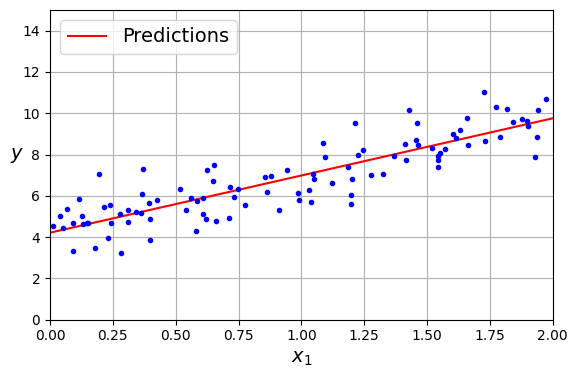

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#  편향(intercept)과 가중치(coef)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [13]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## 4.1.2 계산 복잡도
- 선형 회귀 모델은 예측이 매우 빠르다
- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적
    - 즉, 예측하려는 샘플이 2배로 늘어나면 (또는 특성이 2배로 늘어나면) 걸리는 시간도 거의 두배 증가

# 4.2 경사 하강법
- 경사 하강법(Gradient descent)(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것


### 경사하강법의 원리



- 파라미터 벡터 $\theta$에 대해 비용함수의 현재 그레이디언트를 계산한다.
- 그레이디언트가 감소하는 방향으로 진행
- 그레이디언트가 0이 되면 최솟값에 도달한 것이다.<br>
    <img width="425" alt="homl04-01" src="https://github.com/user-attachments/assets/db8811a6-d774-44d9-8411-ae3dd8888a51">

### 하이퍼 파라미터


- 경사하강법에서 중요한 파라미터는 스텝의 크기, `학습률`하이퍼파라미터로 결정된다.
    - 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해서 시간이 오래걸림
         <img width="425" alt="homl04-02" src="https://github.com/user-attachments/assets/574e25ab-8c2c-47a9-bac8-ee6192a056f3">
    - 너무 크면 골짜기를 가로질러 반대편으로 가서 더 높은 곳으로 가게 된다.
        <img width="425" alt="homl04-03" src="https://github.com/user-attachments/assets/1db3b5f1-2652-444d-8948-cb8354a2a40d">


### 경사 하강법의 문제점



<img width="425" alt="homl04-04" src="https://github.com/user-attachments/assets/195ba0c7-a6c6-4687-b082-bf3b604b1563">

<br>

- 랜덤 초기화 때문에 알고리즘이 왼쪽에서 시작하면 `전역 최솟값`보다 덜 좋은 `지역 최솟값`에 수렴한다.
- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함


### 특성 스케일의 중요성

<img width="563" alt="homl04-04a" src="https://github.com/user-attachments/assets/c99e35ba-ee1a-4c27-b596-730869c926d3">

<br>

특성들의 스켈일을 통일시키면 보다 빠른 학습이 이루어지는 이유를 아래 그림이 설명한다.

- `왼편 그림`: 두 특성의 스케일이 동일하게 조정된 경우엔 비용 함수의 최소값으로 최단거리로 수렴한다. 비용 등고선이 원 모양으로 그려지는 경우를 생각하면 된다.

- `오른편 그림`: 두 특성의 스케일이 다른 경우 비용 함수의 최소값으로 보다 먼 거리를 지나간다. 이런 경우엔 비용 등고선이 타원 모양 또는 찌그러진 모양으로 그려지기 때문이다.


> 예를 들면, 사이킷런의 `StandardScaler`를 사용하는 것



###4.2.1 배치 경사 하강법


$\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산한다.
이를 `편도함수` 라고 한다.

<br>

이 공식은 매 경사 하강법  스텝에서 전체 훈련 세트 X에 대해 계산한다.<br>
이런 이류로 매우 큰 훈련 세트에서는 아주 느리다.<br>
수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규 방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

<br>

**식 4-6: 비용 함수의 그레이디언트 벡터**

<br>

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

<br>

$\eta$는 `학습률`이다.<br>
**식 4-7: 경사 하강법의 스텝**

<br>

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [14]:
# 학습률
eta = 0.1
n_epoch = 1000
m = 100

np.random.seed(42)
# 모델 파라미터를 랜덤하게 초기화 한다.
theta = np.random.randn(2, 1)

for epoch in range(n_epoch):
    gradients = 2/ m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.21509616],
       [2.77011339]])


$\eta = 0.02$: 학습률이 너무 작은 경우

$\eta = 0.1$: 학습률이 적절한 경우

$\eta = 0.5$: 학습률이 너무 큰 경우

![homl04-04b](https://github.com/user-attachments/assets/05c66d36-e611-4e27-9ea2-d351761f9e34)

반복 횟수는 어떻게 지정할까?
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 ϵ(허용오차) 보다 작아지면 경사 하강법이  (거의) 최솟값에 도달한 것이므로 알고리즘을 중지한다.

### 4.2.2 확률적 경사 하강법

확률적 경사 하강법?
 - 매 스텝에서 한 개의 샘플을 랜덤으로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다.
 - 훨씬 빠르다.
 - 매우 큰 훈련 세트도 훈련시킬 수 있다.
 - 지역 최솟값을 건너뛰도록 도와준다.
<img width="383" alt="homl04-04c" src="https://github.com/user-attachments/assets/e1f3cb40-625d-43e8-a67f-14ed06a1ec2f">
<br>

 반면
  - 배치 경사 하강법보다 훨씬 불안정하다.
  - 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래롤 요동치며 평균적으로 감소하기 때문
  - 전역 최솟값에 다다르지 못할 수 있다.

<br>

전역 최솟값에 다다르지 못하는 점을 해결하는 한 가지 방법으로 학습률을 점진적으로 감소시키는 것이다.
- 매 반복에서 학습률을 결정하는 함수를 `학습 스케줄` 이라 한다.

In [16]:
n_epochs = 50
# 학습 스케줄 하이퍼파라미터
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index +1]
        yi = y[random_index: random_index +1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.1, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, n_iter_no_change=100, penalty=None, random_state=42,
             tol=1e-05)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22612746]), array([2.79035392]))

### 4.2.3 미니배치 경사 하강법

배치 크기($m_b$
)를 2 이상으로 잡는 경사하강법이다. 보통 2에서 수백 사이로 정한다. 배치 크기를 적절히 크게 잡으면 확률적 경사하강법(SGD) 보다 파라미터의 움직임이 덜 불규칙적이 되며, 배치 경사하강법보다 훨씬 빠르게 최적 학습 모델에 수렴한다. 다만 SGD에 비해 지역 최소값에 수렴할 위험도가 보다 커질 수 있다. 하지만 대부분의 딥러닝 심층 신경망 모델에서 지원된다.

세 경사하강법 비교

아래 그림은 앞서 배치/확률적/미니 배치 경사하강법을 진행할 때 학습되는 파라미터들의 변화 과정을 보여준다.

- 배치 경사하강법 파라미터 변화: 진동없이 최적 파라미터에 수렴. 하지만 훈련 시간이 가장 길고, 큰 훈련셋에서는 적용할 수 없음.

- 확률적 경가하강법 파라미터 변화: 진동 심함. 최적 파라미터 근처에서 계속 진동하고 수렴하지 못함. 하지만 학습 시간이 매우 짧아서 대용량 훈련셋에 대해 잘 작동함.

- 미니 배치 경사하강법 파라미터 변화: 진동이 상대적으로 약하며 나름 최적 파라미터에 잘 접근함. 학습 스케줄을 이용하여 훈련이 진행될 수록 학습률을 줄이면 최적 파라미터에 가깝게 근접함.


![homl04-05](https://github.com/user-attachments/assets/90cef062-8e56-4f10-806f-93b3b85f41fd)


# 4.3 다항 회귀

In [20]:
np.random.seed(42)
m =100
X = 6*np.random.rand(m, 1) - 3
y =0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

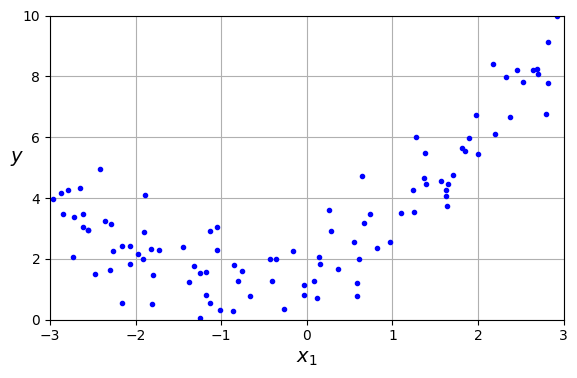

In [21]:
# 추가 코드 - 이 셀은 그림 4-12를 생성하고 저장합니다.
# 잡음이 생긴 비선형 데이터셋
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [23]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

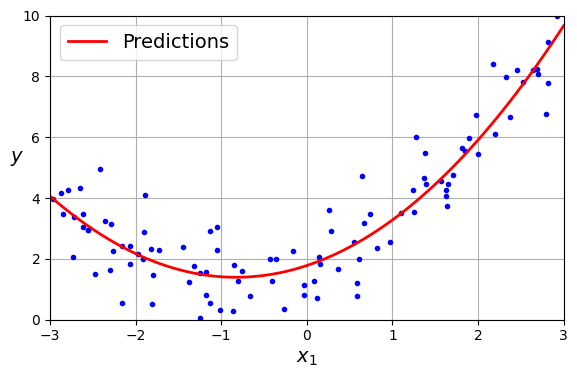

In [25]:
# 추가 코드 - 이 셀은 그림 4-13을 생성하고 저장합니다.
# 다항 회귀 예측 모델
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

다항 회귀의 단점

몇차 다항 회귀를 사용해야 할지 일반적으로 알 수 없다. 또한 심층 신경망처럼 비선형 데이터를 분석하는 보다 좋은 모델이 개발되어 굳이 다항 회귀를 사용할 필요가 없어졌다. 여기서는 비선형 데이터 분석을 선형 회귀 모델로 제대로 예측할 수 없음을 보여주기 위해 언급되었다.

# 4.4 학습 곡선

사용되는 모델에 따라 훈련된 모델의 성능이 많이 다를 수 있다. 아래 그림은 기본 선형 모델은 성능이 너무 좋지 않은 반면에 300차 다항 회귀 모델은 너무 과하게 훈련 데이터에 민감하게 반응하는 것을 보여준다. 반면에 2차 다항 회귀 모델이 적절(?)하게 예측값을 계산하는 것으로 보인다.

![image](https://github.com/user-attachments/assets/1b0387af-bab2-40f6-ae11-2dd7c989d465)


모델 성능 평가: 교차 검증 vs. 학습 곡선

일반적으로 어떤 모델이 가장 좋은지 미리 알 수 없다. 따라서 보통 다양한 모델을 대상으로 교차 검증을 진행하여 성능을 평가한다. 교차 검증 결과에 따른 모델 평가는 다음 두 종류로 나뉜다.

- 과소적합: 훈련 점수와 교차 검증 점수 모두 낮은 경우

- 과대적합: 훈련 점수는 높지만 교차 검증 점수가 상대적으로 많이 낮은 경우

다른 검증 방법은 학습 곡선learning curve을 잘 살펴보는 것이다. 학습 곡선은 훈련셋과 검증 세트에 대한 모델 성능을 비교하는 그래프이며, 학습 곡선의 모양에 따라 과소 적합 또는 과대 적합 여부를 판정할 수 있다.

사이킷런의 `learning_curve()` 함수를 이용하여 학습 곡선을 그릴 수 있다.

- x 축: 훈련셋 크기. 전체 훈련셋의 1%에서 출발하여 훈련셋 전체를 대상으로 할 때까지 훈련셋의 크기를 키워가며 교차 검증 진행.

- y 축: 교차 검증을 통해 확인된 훈련셋 및 검증셋 대상 `RMSE(평균 제곱근 오차)`.

과소 적합 모델의 학습 곡선 특징

아래 그래프는 2차 다항 함수의 분포를 따르는 데이터셋에 `LinearRegression` 모델을 적용한 학습 곡선을 보여준다.

- 훈련셋(빨강)에 대한 성능: 훈련셋이 커지면서 RMSE 증가하지만 훈련셋이 어느 정도 커지면 거의 불변.

- 검증셋(파랑)에 대한 성능: 검증 세트에 대한 성능이 훈련셋에 대한 성능과 거의 비슷해짐.

![image](https://github.com/user-attachments/assets/0c2f4257-b078-4d85-a4f6-65784157d6f9)

과대 적합 모델의 학습 곡선 특징

아래 그래프는 2차 다항 함수의 분포를 따르는 데이터셋에 10차 다항회귀 모델을 적용한 학습 곡선을 보여준다.

- 훈련셋(빨강)에 대한 성능: 훈련 데이터에 대한 평균 제곱근 오차가 매우 낮음.

- 검증셋(파랑)에 대한 성능: 훈련 데이터에 대한 성능과 차이가 어느 정도 이상 벌어짐.


![image](https://github.com/user-attachments/assets/6c8c57c0-8b98-4492-a9e0-e307893abc31)

과대 적합 모델 개선법

과대 적합 모델을 개선하기 위해 일반적으로 학습 곡선에 사용된 두 그래프가 맞닿을 때까지 훈련 데이터를 추가한다. 하지만 일반적으로 더 많은 훈련 데이터를 구하는 일이 매우 어렵거나 불가능할 수 있기 때문에 일반적으로 모델 규제를 적용한다.

모델의 일반화 성능

훈련 과정에서 다루지 않은 새로운 데이터 대한 예측 능력이 모델의 일반화 성능이다. 새로운 데이터에 대한 모델의 예측에 나쁜 영향을 미치는 요소는 일반적으로 다음 세 가지가 있다.

- 편향: 실제로는 2차원 모델인데 1차원 모델을 사용하는 경우처럼 데이터의 분포에 대한 잘못된 가정으로 인해 발생한다. 과소 적합이 발생할 가능성이 매우 높다.

- 분산: 모델이 훈련 데이터에 민감하게 반응하는 정도를 가리킨다. 고차 다항 회귀 모델처럼 모델이 학습해야하는 파라미터의 수가 많을 수록, 즉 모델의 자유도degree of freedom가 높을 수록 분산이 커진다.

- 제거 불가능 오류: 잡음(noise) 등 데이터 자체의 한계로 인해 발생한다. 데이터 전처리 과정에서 잡음 등을 제거해야만 오류를 줄일 수 있다.

편향-분산 트레이드오프

- 복잡한 모델일 수록 편향을 줄어들지만 분산은 커지는 현상을 가리킨다.

# 4.5 규제가 있는 선형 모델
회귀 모델에 대한 규제regularization는 가중치의 역할을 제한하는 방식으로 이루어지며, 방식에 따라 다음 세 가지 회귀 모델이 지정된다.

- 릿지 회귀
- 라쏘 회귀
- 엘라스틱 넷

### 4.5.1 릿지 회귀

릿지 회귀의 비용함수:
$$J(\Theta) = MSE(\Theta) + \frac {a} {m} \sum_{i=1}^n θ_i^2$$

- $a$: 규제의 강도
    - $a = 0$ 일 때 규제가 없다. 선형 회귀와 같아짐
    - $a$ 가 커질 수록 가중치의 역할이 줄어듦. 비용을 줄이기 위해 가중치를 작게 유지하도록 훈련되어 결국 모델의 분산 정도가 작아짐.
- 편향 $\theta_0$: 규제에서 제외

`StandardScaler` 등을 사용하여 특성 스케일링을 진행 한 다음에 규제를 적용해야 모델의 성능이 좋아진다. 이유는 $\theta_i$값이 특성의 크기에 의존하기에 모든 특성의 크기를 비슷하게 맞추면 $\theta_i$가 보다 일정하게 수렴하기 때문이다.

아래 그림은 서로 다른 규제 강도를 사용한 릿지 회귀 모델의 훈련 결과를 보여준다.

- 왼편: 선형 회귀 모델에 세 개의
 값 적용.
- 오른편: 10차 다항 회귀 모델에 세 개의
 값 적용.


![image](https://github.com/user-attachments/assets/defd5f6c-10a3-419f-8997-47a5d0879991)

### 4.5.2 라쏘 회귀

라쏘 회귀의 비용함수:
$$J(\theta) = MSE(\theta) + 2a \sum_{t=1}^n|\theta_i|$$


- 왼편: 선형 회귀 모델에 세 개의
 값 적용.
- 오른편: 10차 다항 회귀 모델에 세 개의
 값 적용.

![image](https://github.com/user-attachments/assets/59739cd2-0a03-429e-a8d8-5e43f5c5240d)



In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])


![image](https://github.com/user-attachments/assets/cb3b4db9-19af-4a6b-ab99-7db96861923d)


### 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 혼합 정도는 혼합 비율 $r$을 사용해 조절
- $r$=0 이면 엘라스틱넷은 릿지 회귀와 같다
- $r$=1 이면 엘라스틱넷은 라쏘 회귀와 같다

엘라스틱넷 비용 함수:
$$J(\theta) = MSE(\theta) + r(2a\sum_{i=1}^n|\theta_i|) + (1-r)(\frac {a} {m}\sum_{i=1}^n \theta_i^2)$$

### 규제 선택

약간이라도 규제를 사용해야 하며, 일반적으로 릿지 회귀가 추천된다. 반면에 유용하지 않은 속성이 많다고 판단되는 경우엔 라쏘 회귀 또는 엘라스틱 넷이 추천된다. 하지만 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 상호 강하게 연관되어 있는 경우엔 엘라스틱 넷을 추천한다.

In [27]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

### 4.5.4 조기 종료

조기 종료early stopping는 모델이 훈련셋에 과대 적합하는 것을 방지하기 위해 훈련을 적절한 시기에 중단시키는 기법이며, 가장 많이 사용된다. 조기 종료는 검증셋에 대한 비용 함수의 값이 더 이상 줄어들지 않으면 바로 훈련을 종료한다.

아래 그래프는 2차 함수 곡선 형식으로 분포된 데이터셋에 90차 다항 회귀 모델을 훈련시킨 결과를 보여준다. 실행된 에포크가 많아질 수록 훈련셋에 대한 모델의 비용(RMSE)이 점차 낮아지는 반면에 검증셋에 대한 비용은 250 에포크 정도 지나면서 늘기 시작한다. 즉, 모델이 훈련셋에 과하게 적응하기 시작했고, 이는 모델의 일반화 성능이 떨어지기 시작함을 의미한다. 따라서 허용된 최대 500 에포크를 훈련하지 않고 250 에포크 정도에서 훈련을 멈추도록 하는 게 조기 종료다.

![image](https://github.com/user-attachments/assets/2c22e508-236e-4e6c-a618-28803ee0908e)

확률적 경사하강법, 미니 배치 경사하강법에서는 비용함숫값이 보다 많이 진동하기에 비용이 언제 최소가 되었는지 알기 어렵다. 따라서 한동안, 보통 5 에포크 정도, 저장된 비용의 최소값보다 비용 함숫값이 높게 유지될 때 훈련을 멈추고 기억해둔 최적의 파라미터를 사용하는 모델로 되돌린다.

# 4.6 로지스틱 회귀

로지스틱 회귀는 회귀 모델의 결과를 분류 모델로 활용할 수 있도록 해주며 분류 모델에서 가장 중요한 역할을 수행한다. 로지스틱 회귀는 이진 분류에 사용되며, 다중 클래스 분류에는 로지스틱 회귀을 일반화한 소프트맥스 회귀가 사용된다.

### 4.6.1 확률 추정

로지스틱 회귀 모델의 확률 추정(벡터 표현식):
$$\hat p = h_\theta(X) = \sigma(Θ^TX) = \sigma(\theta_0 + \theta_1x_1 + .....+ \theta_nx_n)$$

시그모이드 함수:

$$\sigma(t) = \frac {1} {1 + e^{-t}}$$

![image](https://github.com/user-attachments/assets/32fe395b-6f48-415e-bc19-4de5468dfd25)


로지스틱 회귀 모델 예측:

$$y =
\begin{cases}
0 & \hat p \geq 0.5 \\
1 & \hat p \leq 0.5
\end{cases}$$

### 4.6.2 훈련과 비용 함수

하나의 훈련 샘플에 대한 비용함수:

$$c(\Theta) =
\begin{cases}
 -log(\hat p)  & y=1일 때 \\
 -log(1 - \hat p) & y=0일 때
\end{cases}$$

![image](https://github.com/user-attachments/assets/4027a6f1-58b6-47b2-91d6-6c5d427f37fb)


로지스틱 회귀의 비용 함수 (로그 손실):

$$J(\Theta) = - \frac {1} {m} \sum_{i=1}^m [y^{(i)}log(\hat p^{(i)}) + (1-y^{(i)})log(1-\hat p^{(i)})]$$

### 4.6.3 결정 정계

붓꽃의 품종 분류를 로지스틱 회귀로 진행한다. 붓꽃 데이터셋의 샘플은 꽃받침sepal의 길이와 너비, 꽃입petal의 길이와 너비 등 총 4개의 특성으로 이루어진다.

![image](https://github.com/user-attachments/assets/58ef85a5-2784-48be-b45d-4a954c658b28)
![image](https://github.com/user-attachments/assets/484d19ed-5ea1-4d16-8302-6f2309365cd8)


In [28]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [30]:
iris.target.head(3)  # 샘플이 섞여 있지 않습니다.

,target
0,0
1,0
2,0


In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

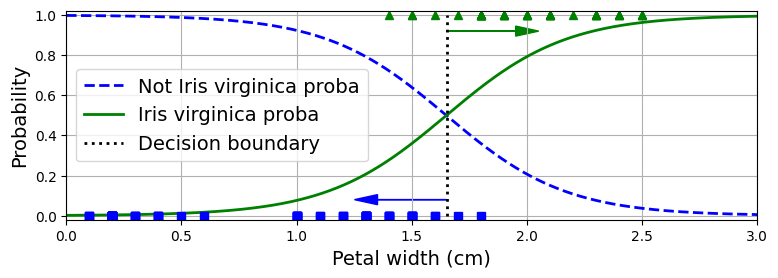

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 크기를 바꾸어 열 벡터를 얻습니다.
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # 추가 코드
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# 추가 코드 - 이 섹션에서는 그림 4-23을 꾸미고 저장합니다.
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [34]:
decision_boundary

1.6516516516516517

In [35]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

로지스틱 회귀 모델 규제

LogisticRegression 모델의 하이퍼파라미터 penalty 와 C 를 이용하여 규제와 규제의 강도를 지정한다.

- penalty: l1 벌점 (라쏘 회귀), l2 벌점(릿지 회귀), elasticnet(엘라스틱 넷) 방식 중 하나 선택하며, 기본값은 l2 벌점이다. 즉, 릿지 회귀를 기본 회귀 모델로 사용한다.

- C: solver로 지정되는 알고리즘에 따라 릿지 회귀 또는 라쏘 회귀 모델에 사용되는
 값의 역수에 해당한다. 따라서 0에 가까울 수록 강한 규제를 의미한다. 기본값은 1이다.

아래 그림의 검정 파선은 꽃잎의 너비와 길이 두 속성을 이용했을 때 버지니카 품종의 여부를 결정하는 결정 경계를 나타낸다. 반면에 다양한 색상의 직선은 버지니카 품종일 가능성(확률)을 보여주는 영역을 구분한다.

![image](https://github.com/user-attachments/assets/ce3a370f-ed54-4176-a3ec-bb73f8f97447)

### 4.6.3 소프트맥스 회귀

로지스틱 회귀 모델을 일반화하여 다중 클래스 분류를 지원하도록 만든 모델이 소프트맥스 회귀Softmax regression다.

클래스 k에 대한 소프트맥스 점수:

$$s_k (X) = (\theta^{(k)})^TX$$

![image](https://github.com/user-attachments/assets/1358b4e3-e1a1-4e61-a07a-82fbf8629fd2)


소프트맥스 함수:

$$\hat p = \sigma(S(X))_k = \frac {sxp(S_k(X))} {\sum_{j=1}^{k}exp(S_j(X))}$$


- $K$ = 클래스 수
- $S(X)$는 샘플 X에 대한 각 클래스의 점수를 담은 벡터
- $\sigma(S(X))_k$는 샘플 $X$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률


소프트맥스 회귀의 비용 함수

각 분류 클래스 $k$에 대한 적절한 가중치들의 벡터 $\theta^{(k)} = [\theta_0^{(k)}, \theta_1^{(k)}, ....., \theta_n^{(k)}]$를 경사하강법을 이용하여 업데이트 한다. 이를 위해 크로스 엔트로피cross entropy를 비용 함수로 사용한다. $K=2$이면 로지스틱 회귀의 로그 손실 함수와 정확하게 일치한다.

- 크로스 엔트로피 비용함수
    - $y_k^{(i)}$: i번째 샘플에 대한 원-핫 인코딩된 타깃
    - $\hat p_k^{(i)}$: i번째 샘플이 클래스 k에 속할 확률 예측값
$$J(\Theta) = - \frac {1} {m_b} \sum_{1=0}^{m_b-1} \sum_{k=0}^{K-1}y_k^{(i)}log(\hat p_k^{(i)})$$



예를 들어, 4 개의 특성과 3개의 품종 클래스를 사용하는 붓꼿 데이터셋의 품종 분류 소프트맥스 회귀 모델에 사용되는 비용 함수의
에 대한 그레이디언트 벡터는 다음과 같다.

![image](https://github.com/user-attachments/assets/7f3931a3-781b-4708-a0cc-f40f2dedb91d)


In [36]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42) # 조금 약한 alpha 규제
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [37]:
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

![20240811173454](https://github.com/user-attachments/assets/5f1b2f0d-07dc-406a-a803-b3d274408f68)